In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv("Auto Sales data.csv")
data.head()

In [7]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

Converting ORDERDATE String object into DateTime type

In [9]:
data["order_dt"]=pd.to_datetime(data["ORDERDATE"],dayfirst=True)
data.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,order_dt
0,10107,30,95.70,2,2871.0,24/02/2018,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018-02-24
1,10121,34,81.35,5,2765.9,07/05/2018,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018-05-07


Creation of Month column 

In [27]:
data["Month"]=data["order_dt"].dt.month

Creation of Year column 

In [28]:
data['Year'] = pd.to_datetime(data['order_dt']).dt.year

In [14]:
data.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,order_dt,Month,Year
0,10107,30,95.70,2,2871.0,24/02/2018,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018-02-24,2,2018
1,10121,34,81.35,5,2765.9,07/05/2018,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018-05-07,5,2018


Finding mean of sales with respect to year and month 

In [15]:
data.groupby(["Year","Month"])["SALES"].mean()

Year  Month
2018  1        3327.015385
      2        3435.029024
      3        3541.120909
      4        3476.026724
      5        3321.950172
      6        3653.968696
      7        3754.637600
      8        3410.505172
      9        3473.333684
      10       3616.556048
      11       3479.181284
      12       3753.088571
2019  1        3526.362651
      2        3621.157326
      3        3673.816607
      4        3221.064375
      5        3695.113378
      6        3372.637882
      7        3594.990000
      8        3469.934361
      9        3376.325368
      10       3477.511006
      11       3613.308157
      12       3389.115091
2020  1        3429.731515
      2        3618.840000
      3        3530.780755
      4        4672.023036
      5        3815.508833
Name: SALES, dtype: float64

Graphical representation of sales with respect to year and month 

<Axes: xlabel='Year,Month'>

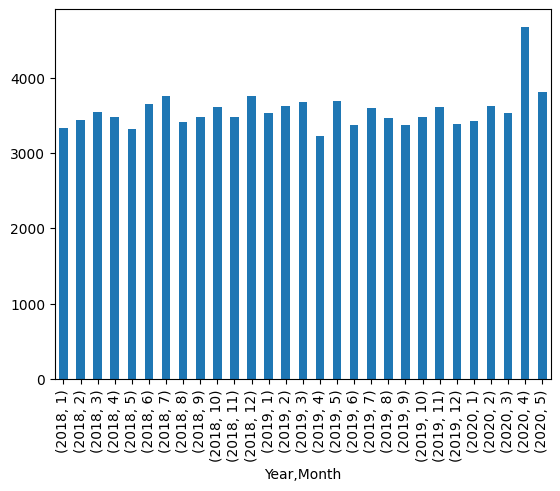

In [16]:
data.groupby(["Year","Month"])["SALES"].mean().plot(kind="bar")

In [17]:
data.groupby(["Year","Month"])["SALES"].mean().reset_index()

,Year,Month,SALES
0,2018,1,3327.015385
1,2018,2,3435.029024
2,2018,3,3541.120909
3,2018,4,3476.026724
4,2018,5,3321.950172
5,2018,6,3653.968696
6,2018,7,3754.637600
7,2018,8,3410.505172
8,2018,9,3473.333684
9,2018,10,3616.556048


Monthly Average Sales

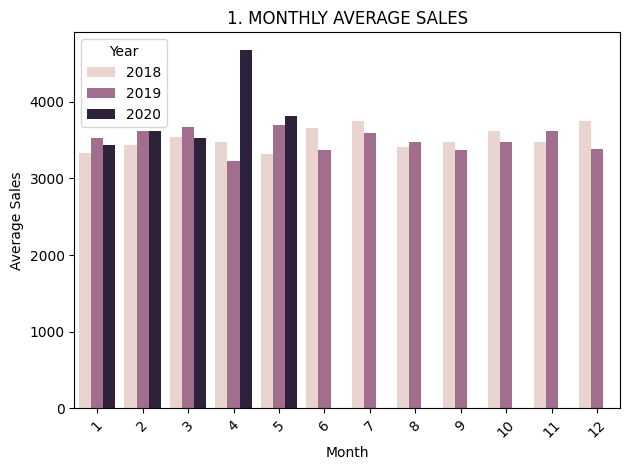

In [18]:
sns.barplot(data=data.groupby(["Year","Month"])["SALES"].mean().reset_index(),x="Month",y="SALES",hue="Year")
plt.title("1. MONTHLY AVERAGE SALES")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Yearly Average Sales

In [36]:
yearly_sales = data.groupby('Year')['SALES'].sum().reset_index()
yearly_sales

,Year,SALES
0,2018,3353014.06
1,2019,4669924.56
2,2020,1737283.09


YEARLY AVERAGE SALES

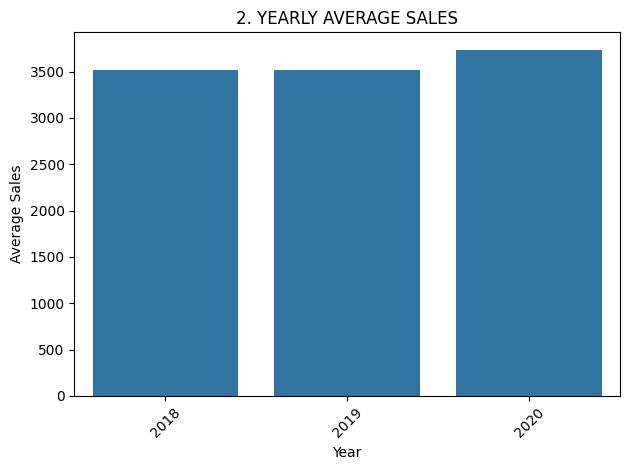

In [20]:
yearly_avg_sales = data.groupby("Year")["SALES"].mean().reset_index()
sns.barplot(x="Year", y="SALES", data=yearly_avg_sales)
plt.title("2. YEARLY AVERAGE SALES")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from geopy.geocoders import Nominatim


Country wise sales 

In [21]:
cw_sales=data.groupby("COUNTRY")["SALES"].sum().reset_index()
cw_sales


,COUNTRY,SALES
0,Australia,630623.10
1,Austria,202062.53
2,Belgium,108412.62
3,Canada,224078.56
4,Denmark,245637.15
5,Finland,329581.91
6,France,1110916.52
7,Germany,220472.09
8,Ireland,57756.43
9,Italy,374674.31


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv("Auto Sales data.csv")
cw_sales=data.groupby("COUNTRY")["SALES"].sum().reset_index()
cw_sales

,COUNTRY,SALES
0,Australia,630623.10
1,Austria,202062.53
2,Belgium,108412.62
3,Canada,224078.56
4,Denmark,245637.15
5,Finland,329581.91
6,France,1110916.52
7,Germany,220472.09
8,Ireland,57756.43
9,Italy,374674.31


In [22]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="MyApp")

Finding out the latitude and longitude of the countries with respect to sales

In [23]:
def latitude(x):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(x)
    return location.latitude

def longitude(x):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(x)
    return location.longitude

cw_sales["lat"] = cw_sales["COUNTRY"].apply(latitude)
cw_sales["long"] = cw_sales["COUNTRY"].apply(longitude)
cw_sales.head()

,COUNTRY,SALES,lat,long
0,Australia,630623.10,-24.776109,134.755000
1,Austria,202062.53,47.593970,14.124560
2,Belgium,108412.62,50.640281,4.666715
3,Canada,224078.56,61.066692,-107.991707
4,Denmark,245637.15,55.670249,10.333328


How do total sales vary month-to-month and year-to-year?

In [38]:
monthly_sales = data.groupby(['Year', 'Month'])['SALES'].sum().reset_index()
monthly_sales

,Year,Month,SALES
0,2018,1,129753.60
1,2018,2,140836.19
2,2018,3,155809.32
3,2018,4,201609.55
4,2018,5,192673.11
5,2018,6,168082.56
6,2018,7,187731.88
7,2018,8,197809.30
8,2018,9,263973.36
9,2018,10,448452.95


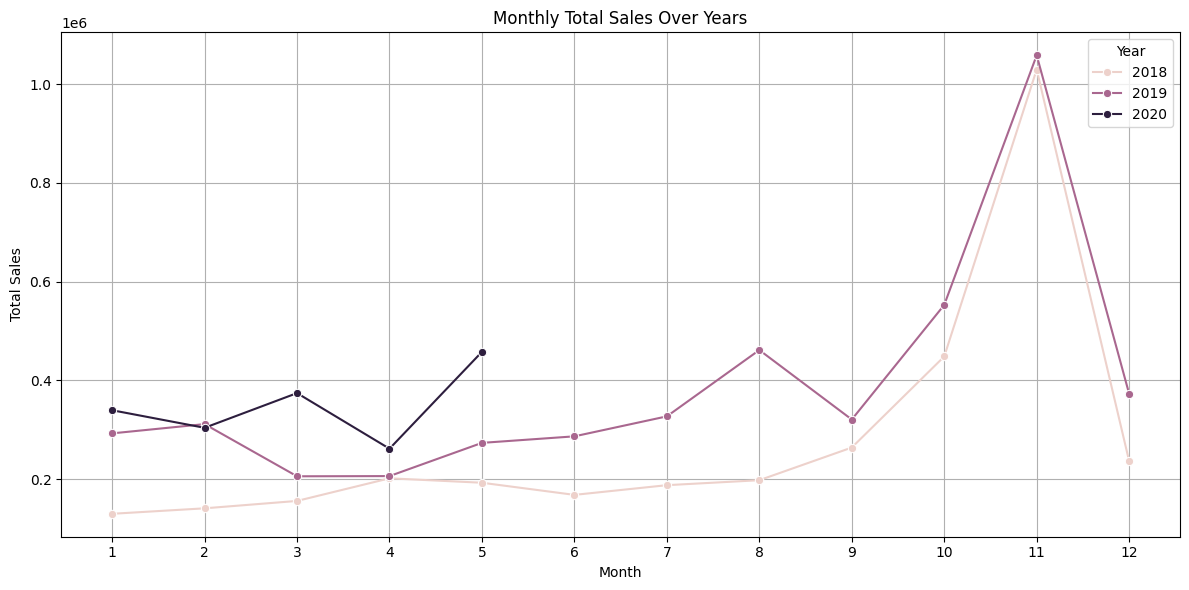

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='SALES', hue='Year', data=monthly_sales, marker='o')

plt.title('Monthly Total Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months (1-12) are shown on x-axis
plt.tight_layout()
plt.show()

C:\Users\lenov\AppData\Local\Temp\ipykernel_1828\972972642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='SALES', data=yearly_sales, palette='viridis')


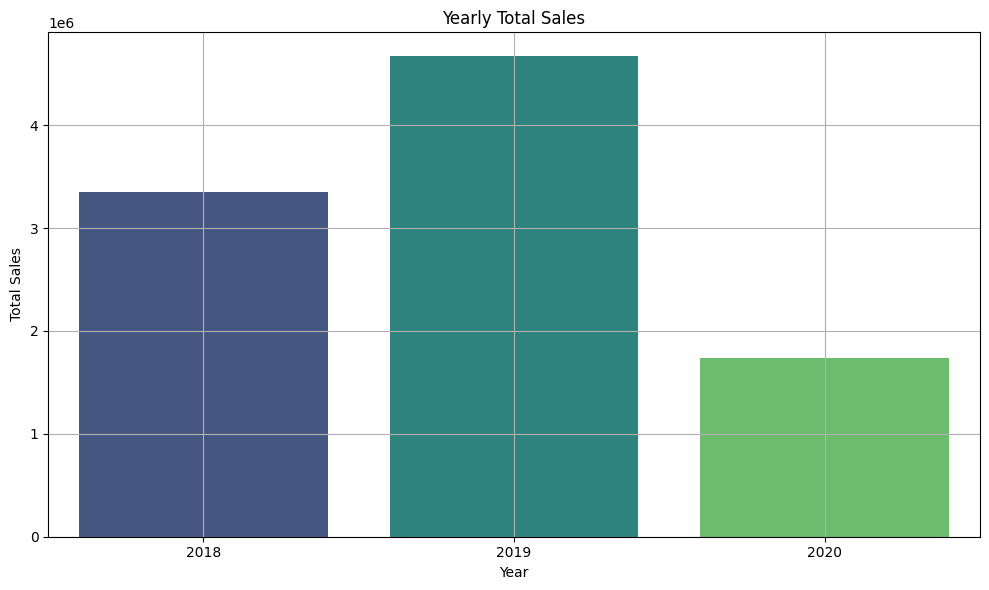

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SALES', data=yearly_sales, palette='viridis')

plt.title('Yearly Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

What are the peak sales months?

In [45]:
monthly_sales_total = data.groupby('Month')['SALES'].sum().reset_index()
monthly_sales_total_sorted = monthly_sales_total.sort_values(by='SALES', ascending=False)
print(monthly_sales_total_sorted)


    Month       SALES
10     11  2088536.95
9      10  1001377.20
4       5   923972.56
0       1   761985.12
1       2   756238.28
2       3   735805.81
3       4   669390.96
7       8   659310.57
11     12   609247.24
8       9   584724.27
6       7   514875.97
5       6   454756.78


C:\Users\lenov\AppData\Local\Temp\ipykernel_1828\2590732707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='SALES', data=monthly_sales_total_sorted, palette='coolwarm')


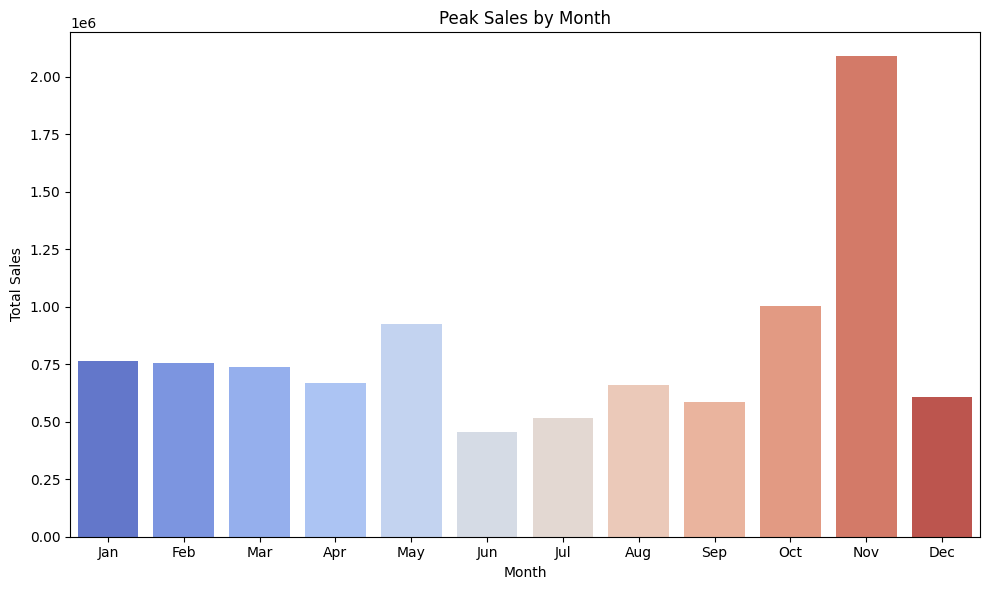

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='SALES', data=monthly_sales_total_sorted, palette='coolwarm')
plt.title('Peak Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

Product Line Analysis:

Which product lines generate the most revenue?

In [47]:
product_line_sales = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
product_line_sales_sorted = product_line_sales.sort_values(by='SALES', ascending=False)
print(product_line_sales_sorted)


        PRODUCTLINE       SALES
0      Classic Cars  3842868.54
6      Vintage Cars  1806675.68
5  Trucks and Buses  1111559.19
1       Motorcycles  1103512.19
2            Planes   969323.42
3             Ships   700039.22
4            Trains   226243.47


C:\Users\lenov\AppData\Local\Temp\ipykernel_1828\2205228751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SALES', y='PRODUCTLINE', data=product_line_sales_sorted, palette='viridis')


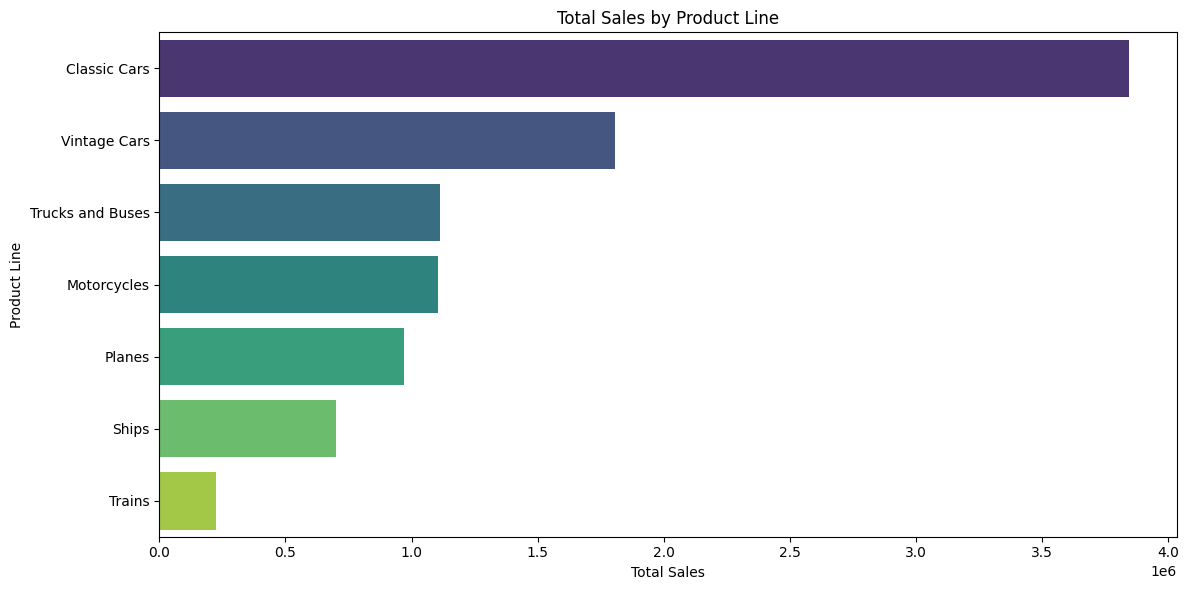

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SALES', y='PRODUCTLINE', data=product_line_sales_sorted, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

What is the average quantity ordered for each product line?

In [49]:
avg_quantity_ordered = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].mean().reset_index()
avg_quantity_ordered_sorted = avg_quantity_ordered.sort_values(by='QUANTITYORDERED', ascending=False)
print(avg_quantity_ordered_sorted)


        PRODUCTLINE  QUANTITYORDERED
5  Trucks and Buses        35.861017
1       Motorcycles        35.399361
4            Trains        35.220779
0      Classic Cars        35.166491
2            Planes        34.986842
3             Ships        34.734783
6      Vintage Cars        34.644214


C:\Users\lenov\AppData\Local\Temp\ipykernel_1828\4157259679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='QUANTITYORDERED', y='PRODUCTLINE', data=avg_quantity_ordered_sorted, palette='viridis')


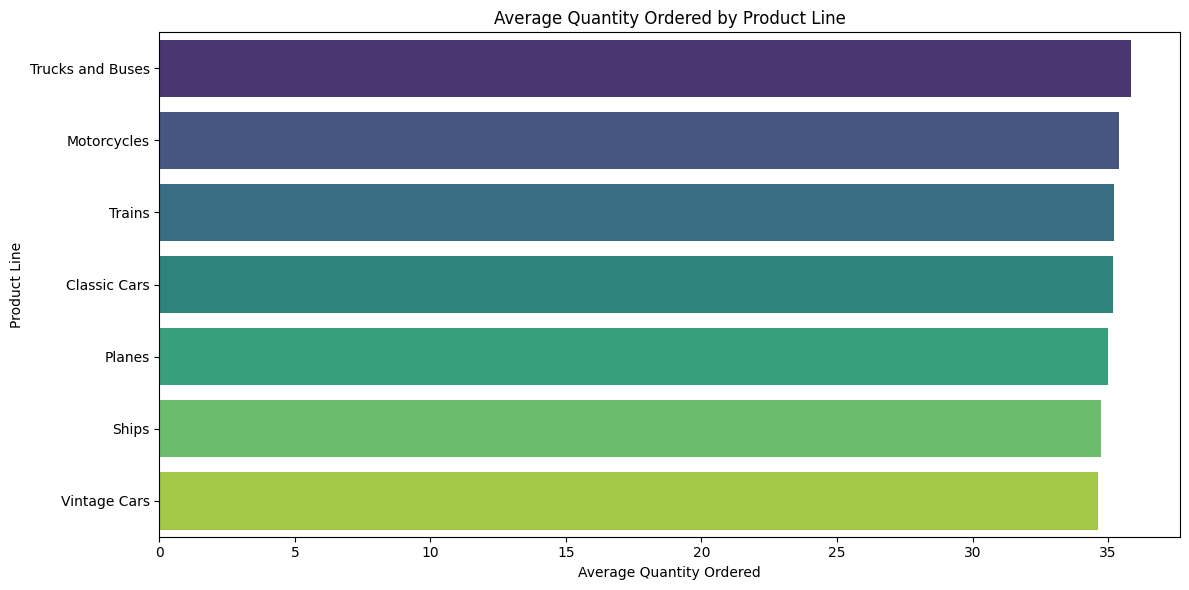

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='QUANTITYORDERED', y='PRODUCTLINE', data=avg_quantity_ordered_sorted, palette='viridis')
plt.title('Average Quantity Ordered by Product Line')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

Are there any noticeable trends in the popularity of specific product lines over time?

<Figure size 1000x600 with 0 Axes>

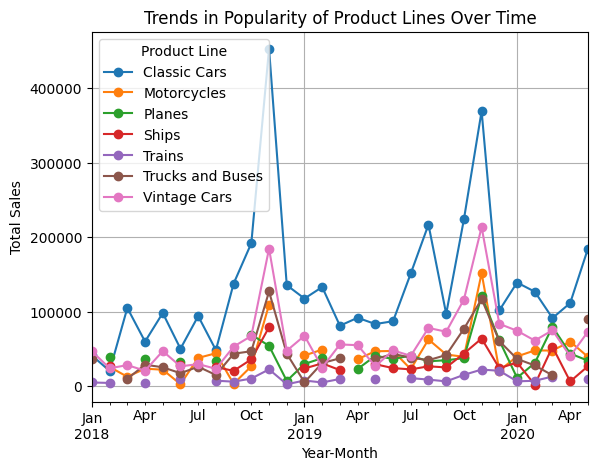

In [51]:
df = pd.DataFrame(data)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')
trend_data = df.groupby(['YearMonth', 'PRODUCTLINE'])['SALES'].sum().unstack()
plt.figure(figsize=(10, 6))
trend_data.plot(marker='o')
plt.title('Trends in Popularity of Product Lines Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.grid(True)
plt.show()

Order Details:

What is the distribution of the order quantities?

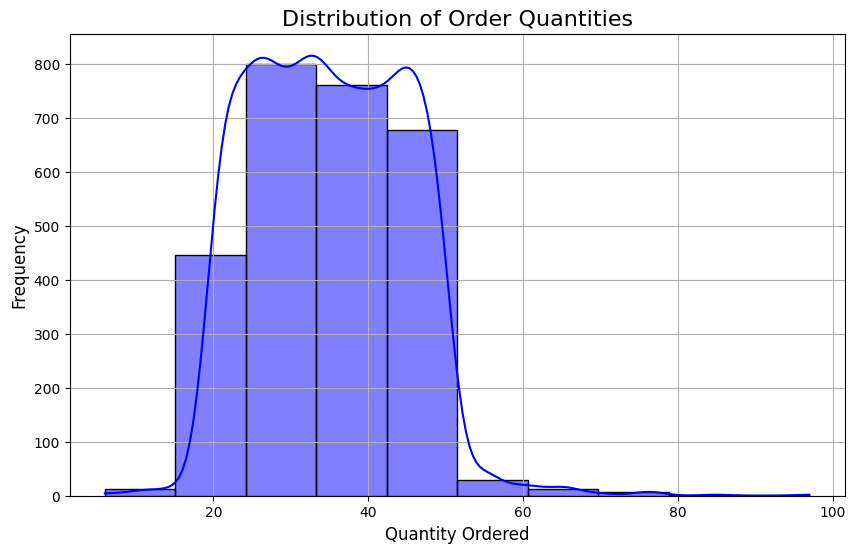

In [52]:
quantity_summary = df['QUANTITYORDERED'].describe()
plt.figure(figsize=(10, 6))
sns.histplot(df['QUANTITYORDERED'], bins=10, kde=True, color='blue')
plt.title('Distribution of Order Quantities', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

How does the PRICEEACH vary across different products and product lines?

In [53]:
price_stats = df.groupby('PRODUCTLINE')['PRICEEACH'].describe()
print("Summary Statistics for PRICEEACH by PRODUCTLINE:")
print(price_stats)

Summary Statistics for PRICEEACH by PRODUCTLINE:
                  count        mean        std    min      25%     50%  \
PRODUCTLINE                                                              
Classic Cars      949.0  115.195680  46.871651  28.29  76.4300  117.33   
Motorcycles       313.0   99.767125  43.128680  32.59  67.0300   93.54   
Planes            304.0   90.517829  31.540388  40.22  69.6000   83.32   
Ships             230.0   88.169261  22.502965  43.68  72.0425   87.11   
Trains             77.0   84.108701  35.396545  36.07  59.6500   67.73   
Trucks and Buses  295.0  104.344983  34.450123  35.71  70.1900  109.96   
Vintage Cars      579.0   90.011261  40.987745  26.88  58.2900   85.75   

                       75%     max  
PRODUCTLINE                         
Classic Cars      148.9900  248.59  
Motorcycles       118.9400  230.46  
Planes            105.2675  233.48  
Ships             102.2000  173.46  
Trains            106.2100  199.49  
Trucks and Buses  130.090

C:\Users\lenov\AppData\Local\Temp\ipykernel_1828\2931299026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df, palette='Set2')


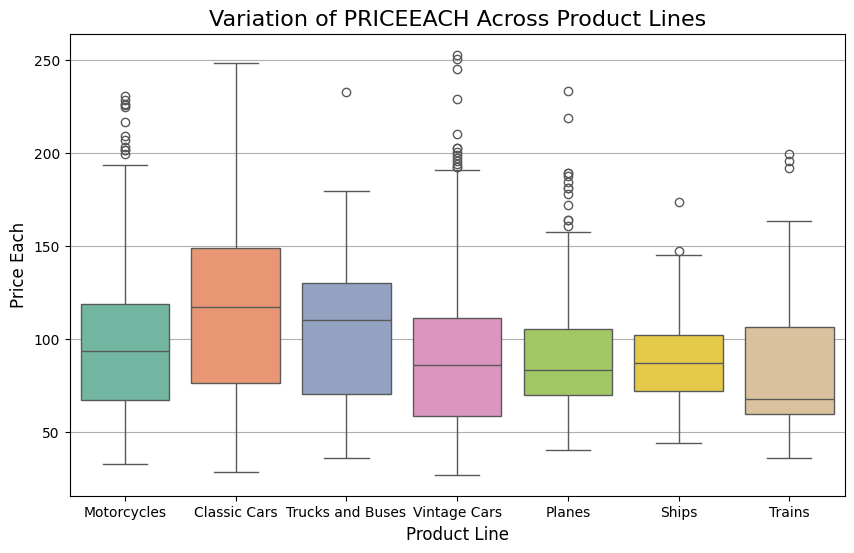

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df, palette='Set2')
plt.title('Variation of PRICEEACH Across Product Lines', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Price Each', fontsize=12)
plt.grid(axis='y')
plt.show()

What is the average sales value per order?

In [55]:
order_sales = df.groupby('ORDERNUMBER')['SALES'].sum()
average_sales_per_order = order_sales.mean()
print(f"Average Sales Value Per Order: ${average_sales_per_order:.2f}")


Average Sales Value Per Order: $32752.42


Customer Insights:

Which countries/cities have the highest number of orders?


In [56]:
orders_by_country = df.groupby('COUNTRY')['ORDERNUMBER'].count().sort_values(ascending=False)
orders_by_city = df.groupby('CITY')['ORDERNUMBER'].count().sort_values(ascending=False)
print("Top Countries by Number of Orders:")
print(orders_by_country)
print("\nTop Cities by Number of Orders:")
print(orders_by_city)

Top Countries by Number of Orders:
COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: ORDERNUMBER, dtype: int64

Top Cities by Number of Orders:
CITY
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Brisbane           15
Munich             14
Burbank            13
Charleroi           8
Name: ORDERNUMBER, Length: 71, dtype: int64


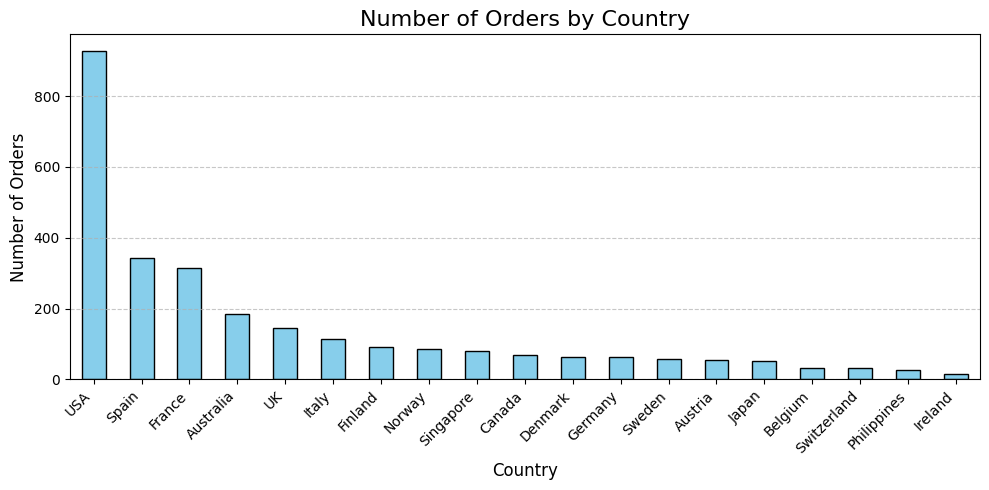

In [61]:
plt.figure(figsize=(10, 5))
orders_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Orders by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


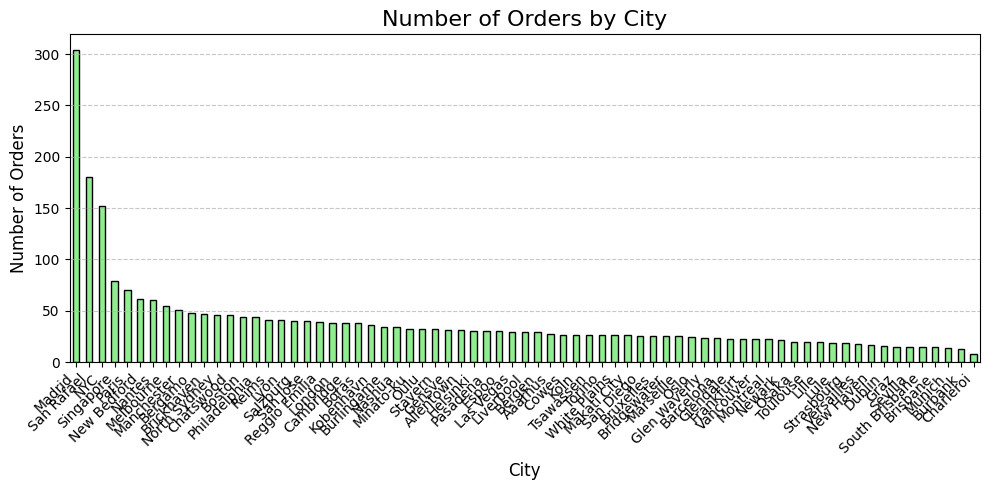

In [62]:
plt.figure(figsize=(10, 5))
orders_by_city.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Orders by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Who are the top customers in terms of total sales?

In [59]:
total_sales_by_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)
print("Top Customers by Total Sales:")
print(total_sales_by_customer)

Top Customers by Total Sales:
CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
                                  ...    
Royale Belge                     33440.10
Microscale Inc.                  33144.93
Auto-Moto Classics Inc.          26479.26
Atelier graphique                24179.96
Boards & Toys Co.                 9129.35
Name: SALES, Length: 89, dtype: float64


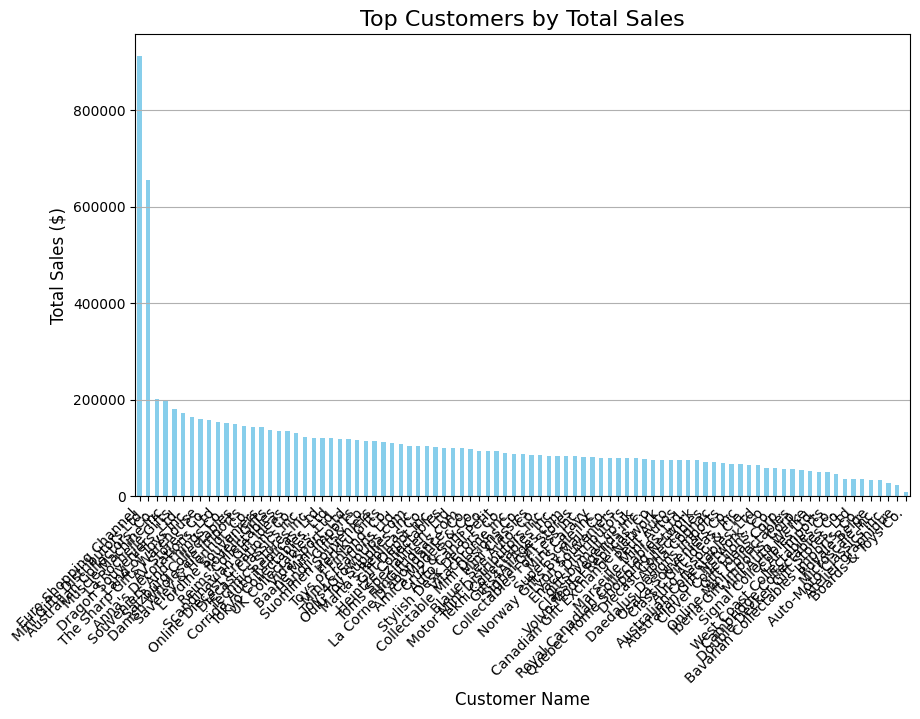

In [60]:
total_sales_by_customer.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top Customers by Total Sales', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Order Status:

What proportion of orders are shipped, cancelled, or on hold?

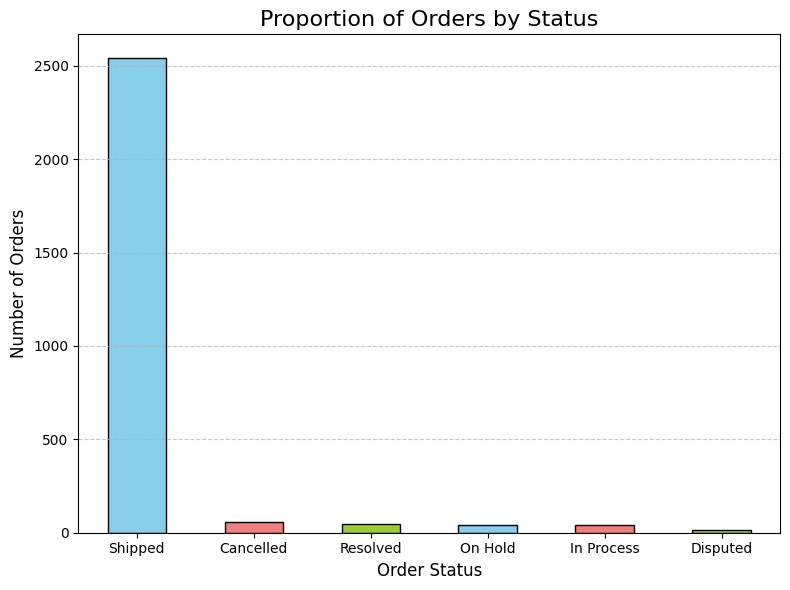

In [63]:
status_counts = df['STATUS'].value_counts()
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'yellowgreen'], edgecolor='black')
plt.title('Proportion of Orders by Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

How does the status distribution vary across different months or years?

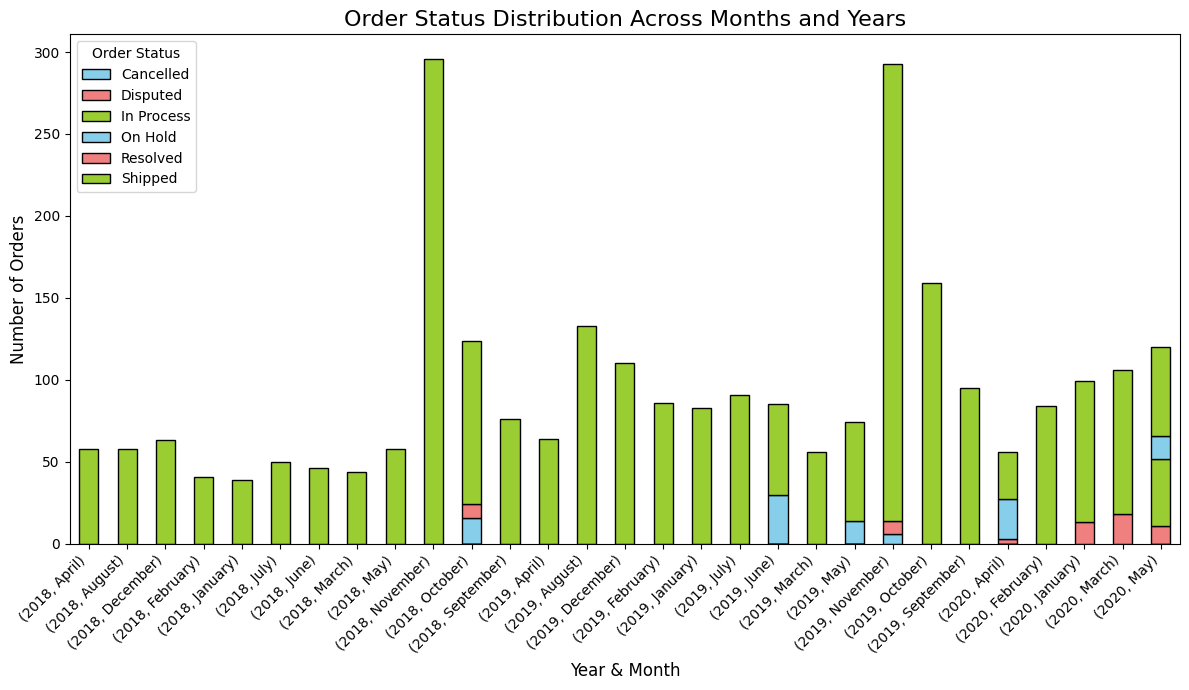

In [64]:
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month_name()
status_by_month_year = df.groupby(['Year', 'Month', 'STATUS']).size().unstack(fill_value=0)
status_by_month_year.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'lightcoral', 'yellowgreen'], edgecolor='black')
plt.title('Order Status Distribution Across Months and Years', fontsize=16)
plt.xlabel('Year & Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Status', loc='upper left')
plt.tight_layout()
plt.show()

Order Timing:

What is the average time (DAYS_SINCE_LASTORDER) between orders for customers?

In [65]:
average_days_between_orders = df.groupby('CUSTOMERNAME')['DAYS_SINCE_LASTORDER'].mean()
print("Average Time Between Orders (in days) for Each Customer:")
print(average_days_between_orders)

Average Time Between Orders (in days) for Each Customer:
CUSTOMERNAME
AV Stores, Co.                 1803.803922
Alpha Cognac                   2236.200000
Amica Models & Co.             1318.615385
Anna's Decorations, Ltd        1463.586957
Atelier graphique              1424.428571
                                  ...     
Vida Sport, Ltd                1362.935484
Vitachrome Inc.                1591.880000
Volvo Model Replicas, Co       1319.789474
West Coast Collectables Co.    1714.769231
giftsbymail.co.uk              2180.807692
Name: DAYS_SINCE_LASTORDER, Length: 89, dtype: float64


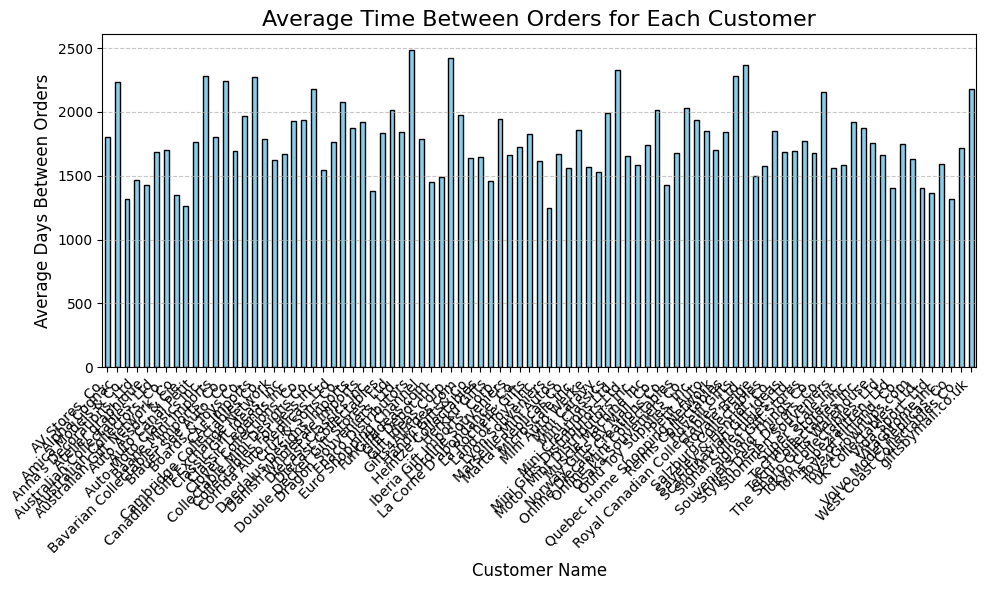

In [66]:
average_days_between_orders.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Average Time Between Orders for Each Customer', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Average Days Between Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Are there any patterns in order frequency for different product lines or deal sizes?

In [67]:
orders_by_productline = df.groupby('PRODUCTLINE')['ORDERNUMBER'].count().sort_values(ascending=False)
orders_by_dealsize = df.groupby('DEALSIZE')['ORDERNUMBER'].count().sort_values(ascending=False)


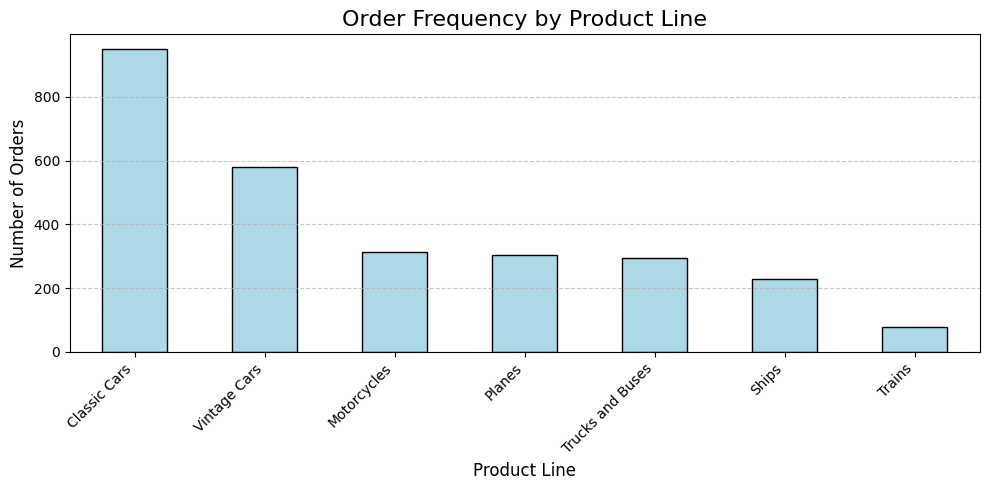

In [68]:
plt.figure(figsize=(10, 5))
orders_by_productline.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Order Frequency by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

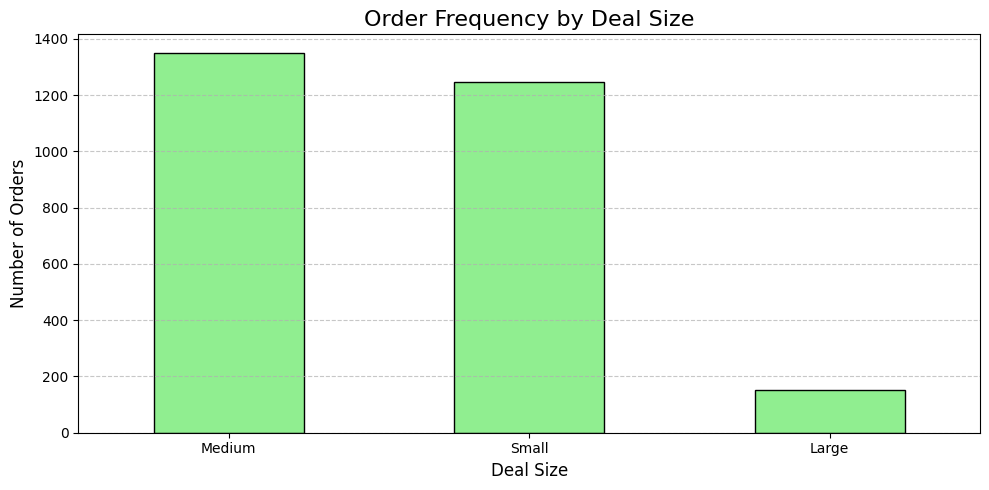

In [69]:
plt.figure(figsize=(10, 5))
orders_by_dealsize.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Order Frequency by Deal Size', fontsize=16)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Sales Performance:

How does the MSRP (Manufacturer's Suggested Retail Price) compare to the PRICEEACH?

In [70]:
df['Price_Difference'] = df['PRICEEACH'] - df['MSRP']
df['Price_Ratio'] = df['PRICEEACH'] / df['MSRP']


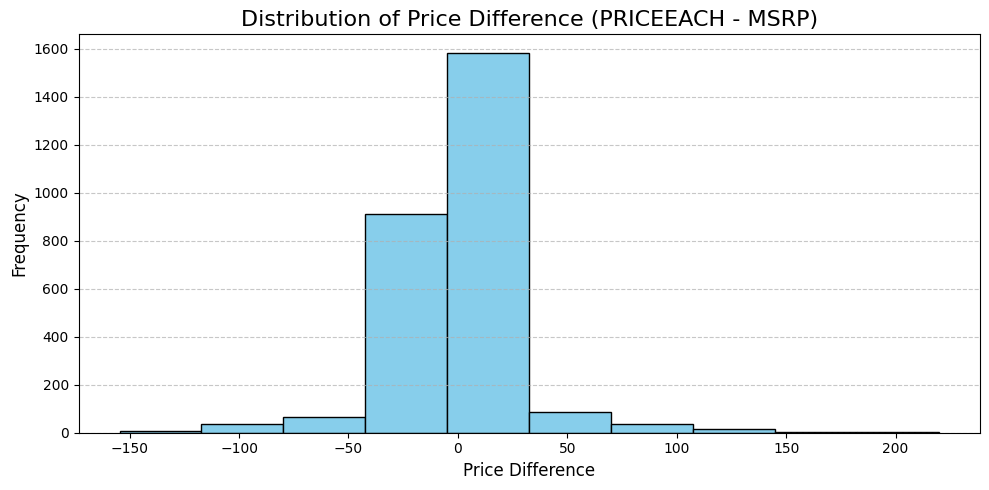

In [71]:
plt.figure(figsize=(10, 5))
plt.hist(df['Price_Difference'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Difference (PRICEEACH - MSRP)', fontsize=16)
plt.xlabel('Price Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

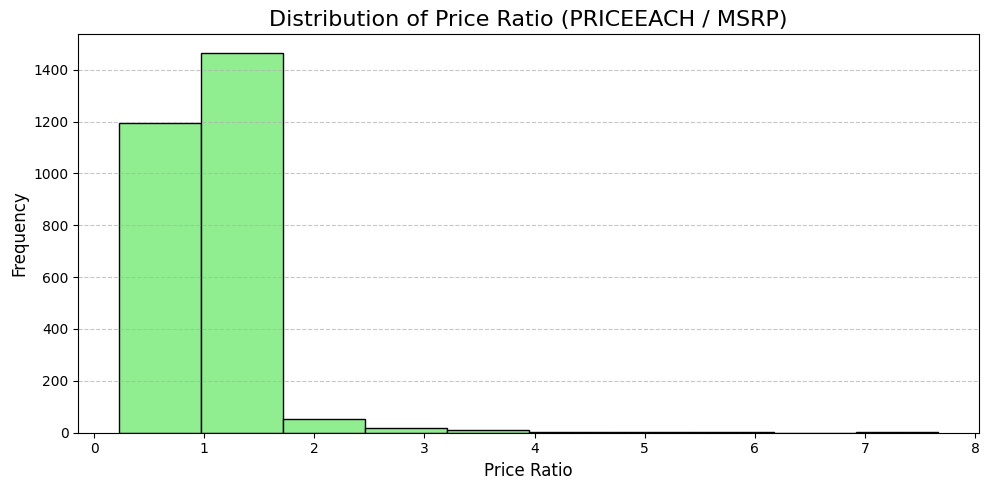

In [72]:
plt.figure(figsize=(10, 5))
plt.hist(df['Price_Ratio'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Price Ratio (PRICEEACH / MSRP)', fontsize=16)
plt.xlabel('Price Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Are there any significant differences in sales performance across different order line numbers?

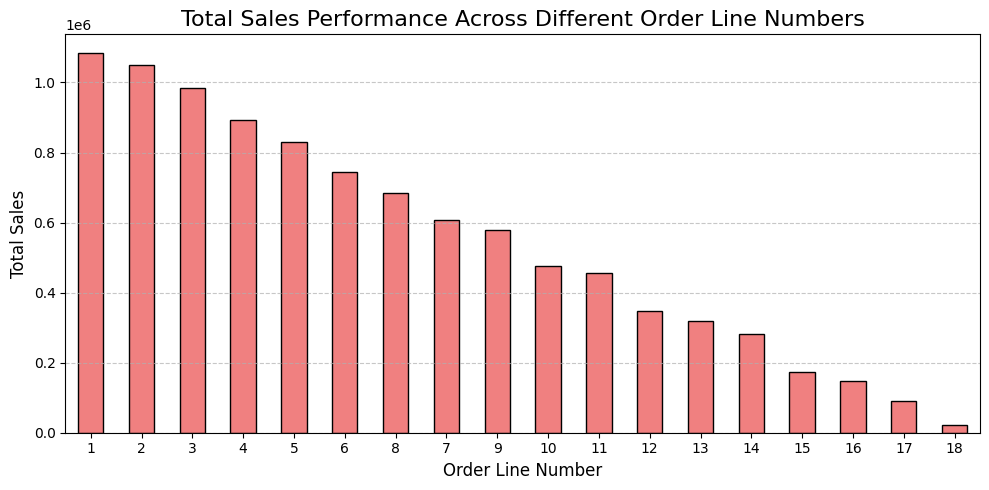

In [73]:
df['TOTALSALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
sales_by_line = df.groupby('ORDERLINENUMBER')['TOTALSALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_line.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total Sales Performance Across Different Order Line Numbers', fontsize=16)
plt.xlabel('Order Line Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Geographical Insights:

What are the top performing regions (countries or cities) in terms of total sales?

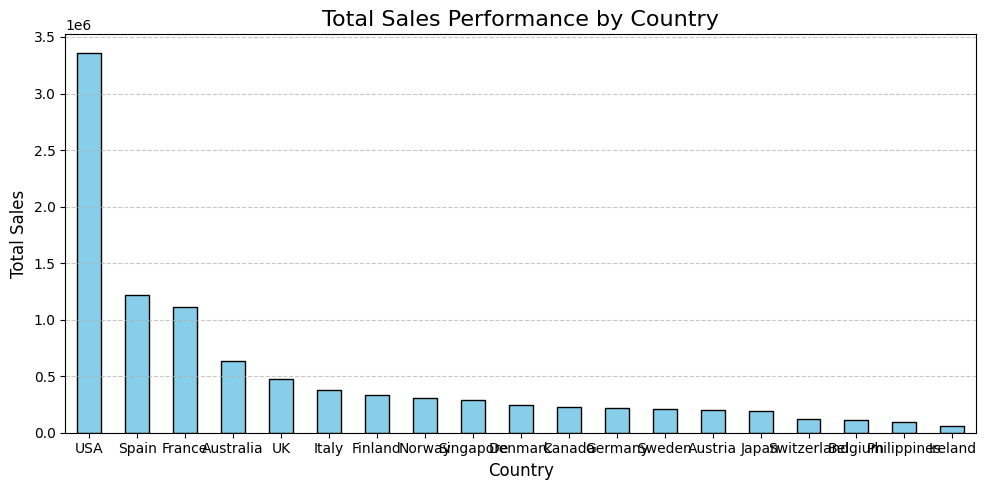

In [75]:
df['TOTALSALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
sales_by_country = df.groupby('COUNTRY')['TOTALSALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales Performance by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

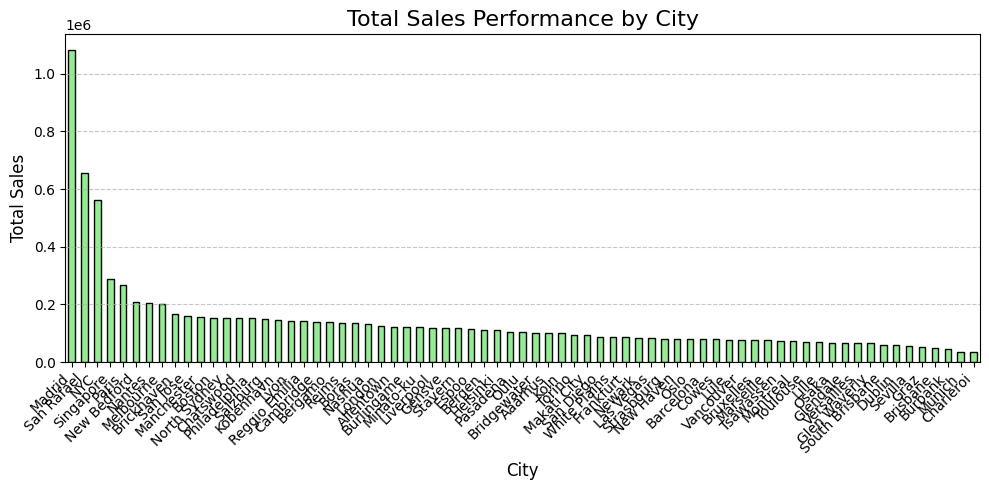

In [78]:
sales_by_city = df.groupby('CITY')['TOTALSALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_city.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Sales Performance by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


How do sales vary geographically?

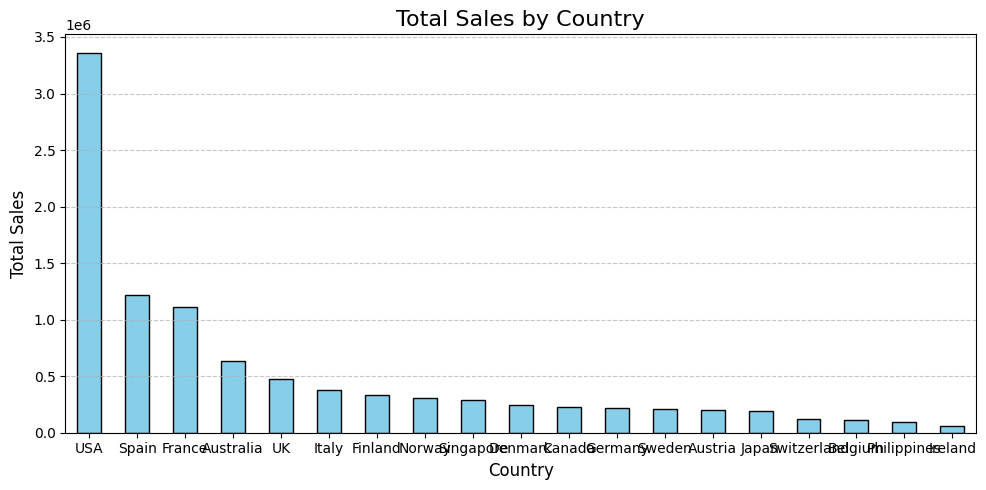

In [79]:
df['TOTALSALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
sales_by_country = df.groupby('COUNTRY')['TOTALSALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Deal Size Analysis:

What are the average sales for different deal sizes (Small, Medium, Large)?

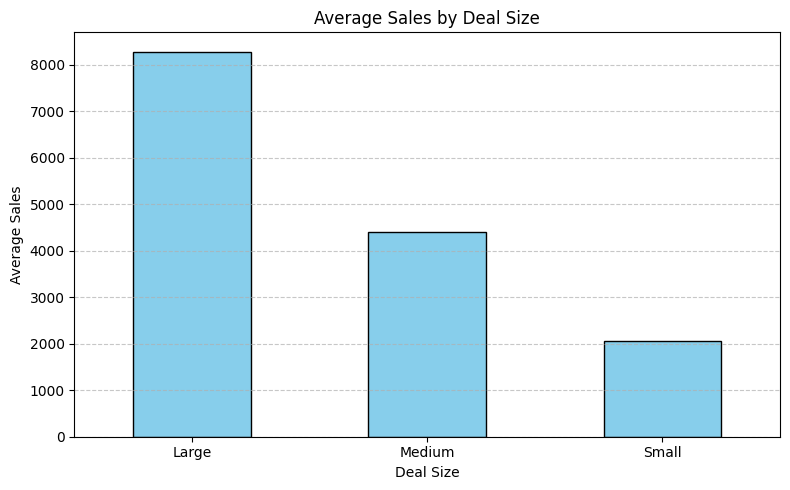

In [3]:
average_sales = data.groupby("DEALSIZE")["SALES"].mean()
plt.figure(figsize=(8, 5))
average_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

How does the quantity ordered and sales value differ across various deal sizes?

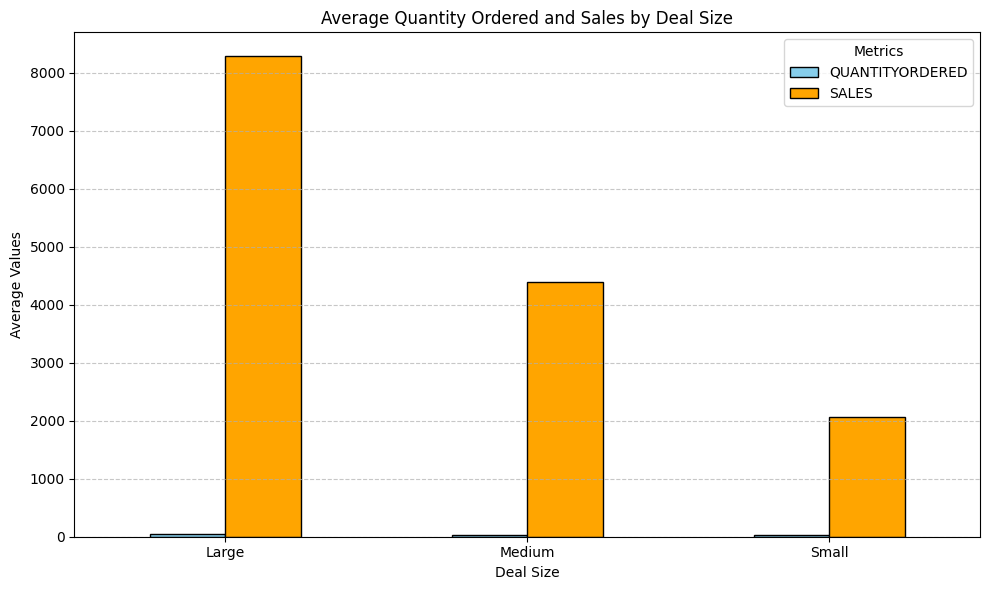

In [4]:
average_metrics = data.groupby("DEALSIZE")[["QUANTITYORDERED", "SALES"]].mean()
average_metrics.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"], edgecolor="black")
plt.title("Average Quantity Ordered and Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Average Values")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Correlation and Trends:

Are there any correlations between QUANTITYORDERED, PRICEEACH, and SALES?

In [5]:
columns_of_interest = ["QUANTITYORDERED", "PRICEEACH", "SALES"]
correlation_matrix = data[columns_of_interest].corr()

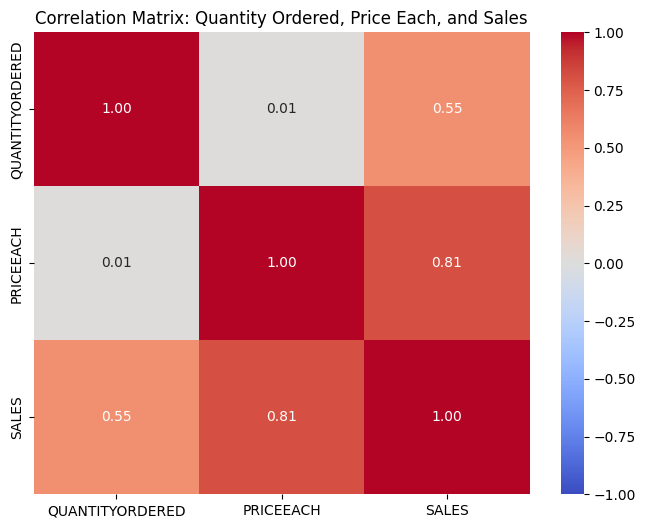

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Quantity Ordered, Price Each, and Sales")
plt.show()

How does the number of days since the last order (DAYS_SINCE_LASTORDER) affect the quantity ordered and sales?

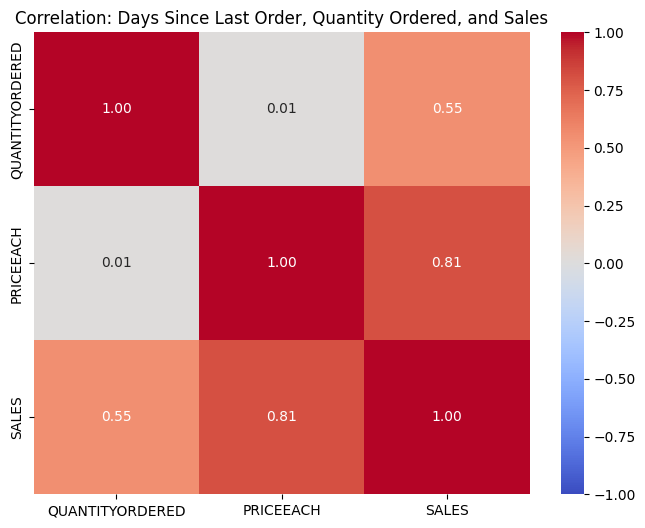

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation: Days Since Last Order, Quantity Ordered, and Sales")
plt.show()

In [10]:
data['DAYS_BIN'] = pd.cut(data['DAYS_SINCE_LASTORDER'], bins=5)  
binned_averages = data.groupby("DAYS_BIN")[["QUANTITYORDERED", "SALES"]].mean()

C:\Users\lenov\AppData\Local\Temp\ipykernel_7724\430769228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_averages = data.groupby("DAYS_BIN")[["QUANTITYORDERED", "SALES"]].mean()


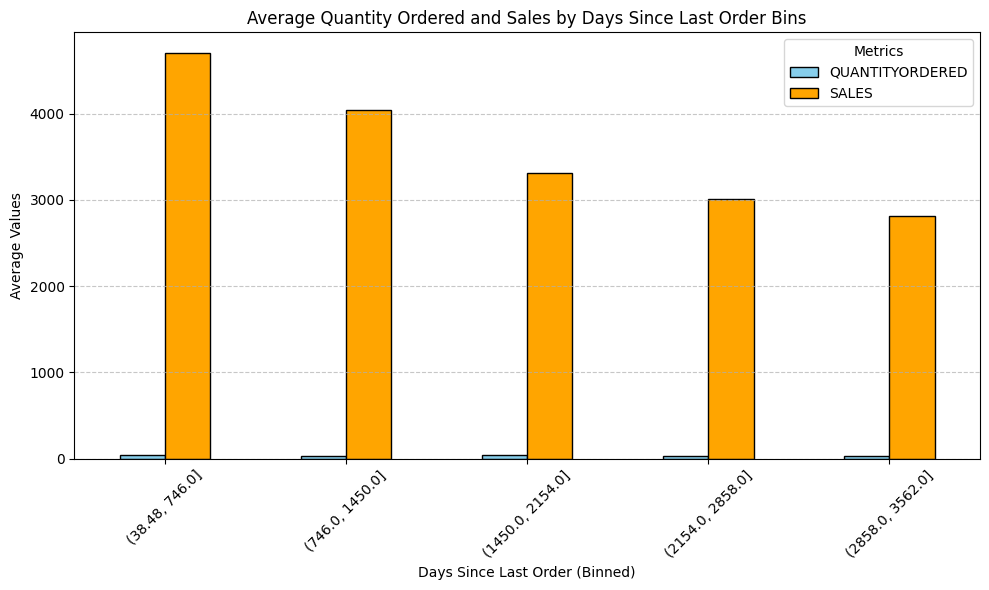

In [11]:
binned_averages.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"], edgecolor="black")
plt.title("Average Quantity Ordered and Sales by Days Since Last Order Bins")
plt.xlabel("Days Since Last Order (Binned)")
plt.ylabel("Average Values")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()